In [30]:
import pandas as pd

# 定义文件路径
file_path = "GSE176265_series_matrix.txt"

# 读取文件，寻找数据表起始行
with open(file_path, 'r', encoding='utf-8') as f:
    lines = f.readlines()

# 找到表格数据的起始位置
start_idx = next(i for i, line in enumerate(lines) if line.startswith('!series_matrix_table_begin'))
end_idx = next(i for i, line in enumerate(lines) if line.startswith('!series_matrix_table_end'))

# 提取数据部分
data_lines = lines[start_idx + 1:end_idx]

# 解析列名
header = data_lines[0].strip().split("\t")  # 第一行为列名
data_lines = data_lines[1:]  # 去除列名行

# 解析数据
df = pd.read_csv(
    file_path,
    sep='\t',
    comment='!',  # 跳过元数据
    header=None,  # 不自动识别列名
    skiprows=start_idx + 2,  # 跳过所有元数据行
    index_col=0,  # 第一列作为索引
    dtype=str,  # 先全部读取为字符串，防止转换出错
    encoding='utf-8'
)

# 设置正确的列名
df.columns = header[1:]  # 第一列是ID_REF，后续为样本

# 仅转换数值列
df = df.apply(pd.to_numeric, errors='coerce')  # 强制转换，无法转换的值填 NaN

# 查看前5行和前5列
print(df.iloc[:5, :5])


              "GSM5361091"  "GSM5361092"  "GSM5361093"  "GSM5361094"  \
0                                                                      
ILMN_1212602      1.907304      1.968824      2.006599      1.934783   
ILMN_1212603      1.868866      1.695158      1.754514      1.781014   
ILMN_1212605      5.719101      5.678606      5.799793      5.925806   
ILMN_1212607      2.084255      2.240173      1.993359      2.052322   
ILMN_1212612      1.480679      1.565527      1.529011      1.391918   

              "GSM5361095"  
0                           
ILMN_1212602      1.810802  
ILMN_1212603      1.837328  
ILMN_1212605      5.762923  
ILMN_1212607      2.105055  
ILMN_1212612      1.512101  


In [31]:
df

,"""GSM5361091""","""GSM5361092""","""GSM5361093""","""GSM5361094""","""GSM5361095""","""GSM5361096""","""GSM5361097""","""GSM5361098""","""GSM5361099""","""GSM5361100""",...,"""GSM5361105""","""GSM5361106""","""GSM5361107""","""GSM5361108""","""GSM5361109""","""GSM5361110""","""GSM5361111""","""GSM5361112""","""GSM5361113""","""GSM5361114"""
0,,,,,,,,,,,,,,,,,,,,,
ILMN_1212602,1.907304,1.968824,2.006599,1.934783,1.810802,1.908161,1.740356,1.751393,1.867400,1.831678,...,3.359559,3.718768,3.634543,3.559089,4.364459,4.566874,4.425302,4.392545,4.502825,4.301967
ILMN_1212603,1.868866,1.695158,1.754514,1.781014,1.837328,1.701739,1.728408,1.803017,1.639022,1.714196,...,1.805549,1.726044,1.786059,1.696397,1.793089,1.737442,1.754177,1.886537,1.802594,1.724471
ILMN_1212605,5.719101,5.678606,5.799793,5.925806,5.762923,5.733765,5.891207,5.842908,5.794197,6.097933,...,4.904861,5.064503,5.017471,4.954911,5.339592,5.342914,5.330214,5.435736,5.253773,5.055824
ILMN_1212607,2.084255,2.240173,1.993359,2.052322,2.105055,2.321024,2.000537,2.074867,2.056405,2.023955,...,2.284110,2.214897,2.214616,2.212791,2.094988,2.235212,2.018446,2.248184,2.210173,2.218453
ILMN_1212612,1.480679,1.565527,1.529011,1.391918,1.512101,1.425028,1.501169,1.269004,1.398815,1.445677,...,1.506781,1.761230,1.499326,1.794960,1.672988,1.660487,1.512686,1.592770,1.504554,1.475942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ILMN_3163569,2.498876,2.227176,2.541867,2.360291,2.477920,2.526226,2.568006,2.374049,2.500966,2.204192,...,2.352425,2.346689,2.570396,2.341789,2.381361,2.608716,2.542838,2.298486,2.522918,2.247221
ILMN_3163572,4.095077,4.048785,4.043040,4.131103,3.982374,4.193387,4.828076,4.565893,4.534393,4.660201,...,5.452701,5.461126,5.427653,5.303526,5.651482,5.610279,5.531740,5.422947,5.506611,5.566180
ILMN_3163577,1.763561,1.742551,1.847922,1.898840,1.909316,1.886395,1.541493,1.998199,1.493683,1.745502,...,1.572778,1.843550,1.611055,1.674197,1.687419,1.674550,1.718182,1.934211,1.708136,1.760398


In [32]:
df.columns

Index(['"GSM5361091"', '"GSM5361092"', '"GSM5361093"', '"GSM5361094"',
       '"GSM5361095"', '"GSM5361096"', '"GSM5361097"', '"GSM5361098"',
       '"GSM5361099"', '"GSM5361100"', '"GSM5361101"', '"GSM5361102"',
       '"GSM5361103"', '"GSM5361104"', '"GSM5361105"', '"GSM5361106"',
       '"GSM5361107"', '"GSM5361108"', '"GSM5361109"', '"GSM5361110"',
       '"GSM5361111"', '"GSM5361112"', '"GSM5361113"', '"GSM5361114"'],
      dtype='object')

In [33]:
import pandas as pd

# 读取 SOFT 文件
file_path = "GSE176265_family.soft"

# 解析 Platform Table（从 `!platform_table_begin` 到 `!platform_table_end` 之间）
with open(file_path, "r", encoding="utf-8") as f:
    lines = f.readlines()

# 找到 Platform Table 的起始和结束行
start_idx = next(i for i, line in enumerate(lines) if "!platform_table_begin" in line)
end_idx = next(i for i, line in enumerate(lines) if "!platform_table_end" in line)

# 提取 Platform Table 内容
platform_data = lines[start_idx + 1:end_idx]

# 解析成 DataFrame
platform_df = pd.DataFrame([x.strip().split("\t") for x in platform_data[1:]], 
                           columns=platform_data[0].strip().split("\t"))

# 只保留关键列：探针 ID (`ID_REF`) 和 基因符号 (`Symbol`)
platform_df = platform_df[["ID", "Symbol"]]

platform_df


,ID,Symbol
0,ILMN_1243094,Thrsp
1,ILMN_1238674,2700007P21Rik
2,ILMN_2454720,2700007P21Rik
3,ILMN_3062534,2700007P21Rik
4,ILMN_3140158,2700007P21Rik
...,...,...
45276,ILMN_2592571,Dnajc28
45277,ILMN_2659025,Mapkap1
45278,ILMN_1221466,1200003N10Rik
45279,ILMN_2607075,Olfr692


In [43]:
import pandas as pd

# 修改为你的本地 SOFT 文件路径
file_path = "GSE176265_family.soft"

with open(file_path, "r", encoding="utf-8") as file:
    soft_lines = file.readlines()

# 识别 Platform Table 的开始和结束位置
platform_start_idx = None
platform_end_idx = None

for i, line in enumerate(soft_lines):
    if line.startswith("!platform_table_begin"):
        platform_start_idx = i
    if line.startswith("!platform_table_end"):
        platform_end_idx = i
        break

# 提取 Platform Table 数据
if platform_start_idx is not None and platform_end_idx is not None:
    platform_data = [line.strip().split("\t") for line in soft_lines[platform_start_idx + 1: platform_end_idx]]
    platform_df = pd.DataFrame(platform_data[1:], columns=platform_data[0])

    # 显示数据基本信息
    #print(platform_df.info())
    #print(platform_df.head())

    # 保存数据到 CSV
    #print("\nPlatform Table 数据已保存至 'Platform_Table.csv'")
else:
    print("未找到 Platform Table")



In [35]:
platform_df

,ID,Species,Source,Search_Key,Transcript,ILMN_Gene,Source_Reference_ID,RefSeq_ID,Entrez_Gene_ID,GI,...,Probe_Coordinates,Cytoband,Definition,Ontology_Component,Ontology_Process,Ontology_Function,Synonyms,Obsolete_Probe_Id,GB_ACC,ORF
0,ILMN_1243094,Mus musculus,Riken,ILMN_204164,ILMN_204164,THRSP,ri|C730035M01|PX00087M15|AK050300|1404,,,,...,,,,A membrane-bounded organelle of eukaryotic cel...,,,,,AK050300,THRSP
1,ILMN_1238674,Mus musculus,RefSeq,ILMN_188674,ILMN_245303,2700007P21RIK,NM_173750.2,NM_173750.2,212772,68299772,...,106804608-106804657,2qE3,Mus musculus RIKEN cDNA 2700007P21 gene (27000...,,,,4930448O08Rik; RP23-12N7.2,4930448O08Rik; RP23-12N7.2,NM_173750.2,2700007P21RIK
2,ILMN_2454720,Mus musculus,RefSeq,ILMN_188674,ILMN_245303,2700007P21RIK,NM_173750.2,NM_173750.2,212772,68299772,...,106802799-106802848,2qE3,Mus musculus RIKEN cDNA 2700007P21 gene (27000...,,,,4930448O08Rik; RP23-12N7.2,4930448O08Rik; RP23-12N7.2,NM_173750.2,2700007P21RIK
3,ILMN_3062534,Mus musculus,RefSeq,ILMN_245303,ILMN_245303,2700007P21RIK,NM_173750.2,NM_173750.2,212772,68299772,...,106810479-106810528,2qE3,Mus musculus RIKEN cDNA 2700007P21 gene (27000...,,,,4930448O08Rik; RP23-12N7.2,4930448O08Rik; RP23-12N7.2,NM_173750.2,2700007P21RIK
4,ILMN_3140158,Mus musculus,RefSeq,ILMN_245303,ILMN_245303,2700007P21RIK,NM_173750.2,NM_173750.2,212772,68299772,...,106803057-106803106,2qE3,Mus musculus RIKEN cDNA 2700007P21 gene (27000...,,,,4930448O08Rik; RP23-12N7.2,4930448O08Rik; RP23-12N7.2,NM_173750.2,2700007P21RIK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45276,ILMN_2592571,Mus musculus,RefSeq,ILMN_209103,ILMN_231998,DNAJC28,NM_138664.2,NM_138664.2,246738,153267501,...,,16qC3.3,"Mus musculus DnaJ (Hsp40) homolog, subfamily C...",,,Interacting selectvely with a heat shock prote...,BC020175; MGC27620,BC020175; MGC27620,NM_138664.2,DNAJC28
45277,ILMN_2659025,Mus musculus,MEEBO,ILMN_215400,ILMN_215400,MAPKAP1,scl00227743.1_265,NM_177345.2,,31340903,...,,,,"A vesicle formed of membrane or protein, found...",,Catalysis of the transfer of a phosphate group...,,,NM_177345.2,MAPKAP1
45278,ILMN_1221466,Mus musculus,Riken,ILMN_202341,ILMN_202341,1200003N10RIK,ri|1200003N10|R000008O13|AK004585|1268,,,,...,,,,,,,,,AK004585,1200003N10RIK
45279,ILMN_2607075,Mus musculus,RefSeq,ILMN_210581,ILMN_210581,OLFR692,NM_146355.1,NM_146355.1,258352,22129592,...,112517750-112517799,7qE3,"Mus musculus olfactory receptor 692 (Olfr692),...",Double layer of lipid molecules that encloses ...,The cascade of processes by which a signal int...,A receptor that binds an extracellular ligand ...,MOR36-1,MOR36-1,NM_146355.1,OLFR692


In [36]:
platform_df.columns

Index(['ID', 'Species', 'Source', 'Search_Key', 'Transcript', 'ILMN_Gene',
       'Source_Reference_ID', 'RefSeq_ID', 'Entrez_Gene_ID', 'GI', 'Accession',
       'Symbol', 'Protein_Product', 'Probe_Id', 'Array_Address_Id',
       'Probe_Type', 'Probe_Start', 'Probe_Sequence', 'Chromosome',
       'Probe_Chr_Orientation', 'Probe_Coordinates', 'Cytoband', 'Definition',
       'Ontology_Component', 'Ontology_Process', 'Ontology_Function',
       'Synonyms', 'Obsolete_Probe_Id', 'GB_ACC', 'ORF'],
      dtype='object')

In [44]:
import pandas as pd



# 读取 Platform Table 数据 (platform_df)
platform_df = pd.read_csv("Platform_Table.csv")  # 请替换为你的 Platform Table 路径

# 修改列名（分组 RANKL 时间点）
column_map = {
    **{col: f"RANKL_0h_{i+1}" for i, col in enumerate(df.columns[:6])},   # 0h
    **{col: f"RANKL_24h_{i-5}" for i, col in enumerate(df.columns[6:12], start=6)},  # 24h
    **{col: f"RANKL_48h_{i-11}" for i, col in enumerate(df.columns[12:18], start=12)},  # 48h
    **{col: f"RANKL_72h_{i-17}" for i, col in enumerate(df.columns[18:24], start=18)},  # 72h
}
df.rename(columns=column_map, inplace=True)

# 替换行索引：将探针 ID 替换为基因 Symbol
probe_to_gene = platform_df.set_index("ID")["Symbol"].to_dict()
df.index = df.index.map(lambda x: probe_to_gene.get(x, x))  # 仍然保留无法匹配的探针 ID

# 显示结果
#print(df.head())

# 保存新 df
df.to_csv("Updated_Expression_Matrix.csv")


In [45]:
df

,RANKL_0h_1,RANKL_0h_2,RANKL_0h_3,RANKL_0h_4,RANKL_0h_5,RANKL_0h_6,RANKL_24h_1,RANKL_24h_2,RANKL_24h_3,RANKL_24h_4,...,RANKL_48h_3,RANKL_48h_4,RANKL_48h_5,RANKL_48h_6,RANKL_72h_1,RANKL_72h_2,RANKL_72h_3,RANKL_72h_4,RANKL_72h_5,RANKL_72h_6
0,,,,,,,,,,,,,,,,,,,,,
Best1,1.907304,1.968824,2.006599,1.934783,1.810802,1.908161,1.740356,1.751393,1.867400,1.831678,...,3.359559,3.718768,3.634543,3.559089,4.364459,4.566874,4.425302,4.392545,4.502825,4.301967
LOC382513,1.868866,1.695158,1.754514,1.781014,1.837328,1.701739,1.728408,1.803017,1.639022,1.714196,...,1.805549,1.726044,1.786059,1.696397,1.793089,1.737442,1.754177,1.886537,1.802594,1.724471
1500011K16Rik,5.719101,5.678606,5.799793,5.925806,5.762923,5.733765,5.891207,5.842908,5.794197,6.097933,...,4.904861,5.064503,5.017471,4.954911,5.339592,5.342914,5.330214,5.435736,5.253773,5.055824
Cradd,2.084255,2.240173,1.993359,2.052322,2.105055,2.321024,2.000537,2.074867,2.056405,2.023955,...,2.284110,2.214897,2.214616,2.212791,2.094988,2.235212,2.018446,2.248184,2.210173,2.218453
Rcan2,1.480679,1.565527,1.529011,1.391918,1.512101,1.425028,1.501169,1.269004,1.398815,1.445677,...,1.506781,1.761230,1.499326,1.794960,1.672988,1.660487,1.512686,1.592770,1.504554,1.475942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Slc16a3,2.498876,2.227176,2.541867,2.360291,2.477920,2.526226,2.568006,2.374049,2.500966,2.204192,...,2.352425,2.346689,2.570396,2.341789,2.381361,2.608716,2.542838,2.298486,2.522918,2.247221
Adcy7,4.095077,4.048785,4.043040,4.131103,3.982374,4.193387,4.828076,4.565893,4.534393,4.660201,...,5.452701,5.461126,5.427653,5.303526,5.651482,5.610279,5.531740,5.422947,5.506611,5.566180
Scn3b,1.763561,1.742551,1.847922,1.898840,1.909316,1.886395,1.541493,1.998199,1.493683,1.745502,...,1.572778,1.843550,1.611055,1.674197,1.687419,1.674550,1.718182,1.934211,1.708136,1.760398


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


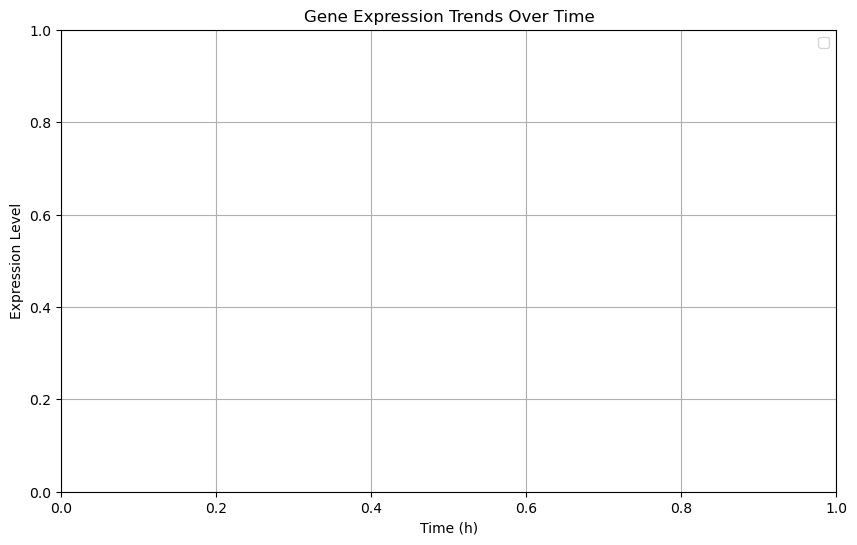

In [39]:
import matplotlib.pyplot as plt


df = pd.read_csv("Updated_Expression_Matrix.csv", index_col=0)
platform_df['Symbol'] = platform_df['Symbol'].astype(str).str.lower()
# key_genes
key_genes = ["nfatc1", "rankl", "ctsk", "mmp9"]
filtered_df = df.loc[df.index.intersection(key_genes)]  # 仅选择目标基因

timepoints = ["0h", "24h", "48h", "72h"]
time_labels = [f"RANKL_{t}_{i+1}" for t in timepoints for i in range(6)]

plt.figure(figsize=(10, 6))
for gene in key_genes:
    if gene in df.index:
        plt.plot(timepoints, filtered_df.loc[gene].values.reshape(4, 6).mean(axis=1), marker="o", label=gene)

plt.xlabel("Time (h)")
plt.ylabel("Expression Level")
plt.title("Gene Expression Trends Over Time")
plt.legend()
plt.grid()
plt.show()


In [40]:
platform_df['Symbol'] = platform_df['Symbol'].astype(str).str.lower()
key_genes = ["nfatc1", "rankl", "ctsk", "mmp9"]
for i in key_genes :
    display(platform_df[platform_df['Symbol']==i])


,ID,Species,Source,Search_Key,Transcript,ILMN_Gene,Source_Reference_ID,RefSeq_ID,Entrez_Gene_ID,GI,...,Probe_Coordinates,Cytoband,Definition,Ontology_Component,Ontology_Process,Ontology_Function,Synonyms,Obsolete_Probe_Id,GB_ACC,ORF
365,ILMN_2647739,Mus musculus,RefSeq,ILMN_184296,ILMN_262008,NFATC1,NM_016791.3,NM_016791.3,18018.0,118131200.0,...,80904799-80904848,18qE3,Mus musculus nuclear factor of activated T-cel...,All of the contents of a cell excluding the pl...,A series of reactions within the cell that occ...,The function of binding to a specific DNA sequ...,NFATc; NFAT2; 2210017P03Rik; Nfatcb; NF-ATc; A...,NFATc; NFAT2; 2210017P03Rik; Nfatcb; NF-ATc; A...,NM_016791.3,NFATC1
366,ILMN_1224430,Mus musculus,RefSeq,ILMN_184296,ILMN_262008,NFATC1,NM_016791.3,NM_016791.3,18018.0,118131200.0,...,80845789-80845838,18qE3,Mus musculus nuclear factor of activated T-cel...,All of the contents of a cell excluding the pl...,A series of reactions within the cell that occ...,The function of binding to a specific DNA sequ...,NFATc; NFAT2; 2210017P03Rik; Nfatcb; NF-ATc; A...,NFATc; NFAT2; 2210017P03Rik; Nfatcb; NF-ATc; A...,NM_016791.3,NFATC1
7072,ILMN_1216522,Mus musculus,RefSeq,ILMN_214484,ILMN_214484,NFATC1,NM_198429.1,NM_198429.1,18018.0,38348192.0,...,80803049-80803098,18qE3,Mus musculus nuclear factor of activated T-cel...,All of the contents of a cell excluding the pl...,A series of reactions within the cell that occ...,The function of binding to a specific DNA sequ...,NFATc; NFAT2; 2210017P03Rik; AV076380; AI44949...,NFATc; NFAT2; 2210017P03Rik; AV076380; AI44949...,NM_198429.1,NFATC1
7073,ILMN_2648455,Mus musculus,RefSeq,ILMN_214484,ILMN_214484,NFATC1,NM_198429.1,NM_198429.1,18018.0,38348192.0,...,80803326-80803375,18qE3,Mus musculus nuclear factor of activated T-cel...,All of the contents of a cell excluding the pl...,A series of reactions within the cell that occ...,The function of binding to a specific DNA sequ...,NFATc; NFAT2; 2210017P03Rik; AV076380; AI44949...,NFATc; NFAT2; 2210017P03Rik; AV076380; AI44949...,NM_198429.1,NFATC1
7074,ILMN_2648704,Mus musculus,RefSeq,ILMN_214484,ILMN_214484,NFATC1,NM_198429.1,NM_198429.1,18018.0,38348192.0,...,80804129-80804178,18qE3,Mus musculus nuclear factor of activated T-cel...,All of the contents of a cell excluding the pl...,A series of reactions within the cell that occ...,The function of binding to a specific DNA sequ...,NFATc; NFAT2; 2210017P03Rik; AV076380; AI44949...,NFATc; NFAT2; 2210017P03Rik; AV076380; AI44949...,NM_198429.1,NFATC1
38960,ILMN_2647734,Mus musculus,MEEBO,ILMN_184296,ILMN_184296,NFATC1,scl51214.9_454,NaN,NaN,31560458.0,...,NaN,NaN,NaN,All of the contents of a cell excluding the pl...,A series of reactions within the cell that occ...,The function of binding to a specific DNA sequ...,NaN,NaN,NM_016791,NFATC1


,ID,Species,Source,Search_Key,Transcript,ILMN_Gene,Source_Reference_ID,RefSeq_ID,Entrez_Gene_ID,GI,...,Probe_Coordinates,Cytoband,Definition,Ontology_Component,Ontology_Process,Ontology_Function,Synonyms,Obsolete_Probe_Id,GB_ACC,ORF


,ID,Species,Source,Search_Key,Transcript,ILMN_Gene,Source_Reference_ID,RefSeq_ID,Entrez_Gene_ID,GI,...,Probe_Coordinates,Cytoband,Definition,Ontology_Component,Ontology_Process,Ontology_Function,Synonyms,Obsolete_Probe_Id,GB_ACC,ORF
24612,ILMN_2711163,Mus musculus,RefSeq,ILMN_219610,ILMN_219610,CTSK,NM_007802.3,NM_007802.3,13038.0,142352209.0,...,95313042-95313091,3qF2.1,"Mus musculus cathepsin K (Ctsk), mRNA.","A cytoplasmic, membrane-bounded organelle that...",The hydrolysis of a peptide bond or bonds with...,"Catalysis of the hydrolysis of various bonds, ...",MMS10-Q; AI323530; catK; Ms10q,MMS10-Q; AI323530; catK; Ms10q,NM_007802.3,CTSK


,ID,Species,Source,Search_Key,Transcript,ILMN_Gene,Source_Reference_ID,RefSeq_ID,Entrez_Gene_ID,GI,...,Probe_Coordinates,Cytoband,Definition,Ontology_Component,Ontology_Process,Ontology_Function,Synonyms,Obsolete_Probe_Id,GB_ACC,ORF
40531,ILMN_2711075,Mus musculus,RefSeq,ILMN_219604,ILMN_219604,MMP9,NM_013599.2,NM_013599.2,17395.0,31560795.0,...,164781193-164781242,2qH3,"Mus musculus matrix metallopeptidase 9 (Mmp9),...",The space external to the outermost structure ...,"The chemical reactions and pathways, including...","Catalysis of the hydrolysis of various bonds, ...",MMP-9; Clg4b; protease; pro-MMP-9; zymogen; B/...,MMP-9; Clg4b; protease; pro-MMP-9; zymogen; B/...,NM_013599.2,MMP9


In [41]:
365,366,7072,7073,7074,38960,24612,40531

(365, 366, 7072, 7073, 7074, 38960, 24612, 40531)

In [42]:
# 过滤出 Symbol 为 'NFATC1' 的数据
nfatc1_df = platform_df[platform_df['Symbol'].str.upper() == "NFATC1"]

# 定义输出文件路径
output_path = "NFATC1_filtered_genes.csv"

# 保存数据到 CSV 文件
nfatc1_df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"NFATC1 基因相关数据已成功保存到 {output_path}")


NFATC1 基因相关数据已成功保存到 NFATC1_filtered_genes.csv
